In [2]:
from scipy.io import loadmat
import h5py
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [3]:
filelist = ["calcium_data/140708B_140811a_result", 
            "calcium_data/140909C_141112a_result", 
            "calcium_data/141006C_141121a_result",
            "calcium_data/150109A_150302a_result", 
            "calcium_data/151122A_160202a_result", 
            "calcium_data/151122B_160207a_result", 
            "calcium_data/160209A_160430a_result", 
            "calcium_data/160209B_160428a_result"]

In [21]:
filename = filelist[1]

In [22]:
f = h5py.File(filename+".hdf5", "r")

In [23]:
n_trials = f['data'][:].shape[0]
n_licktimes = f['licktimes'][:].shape[1]

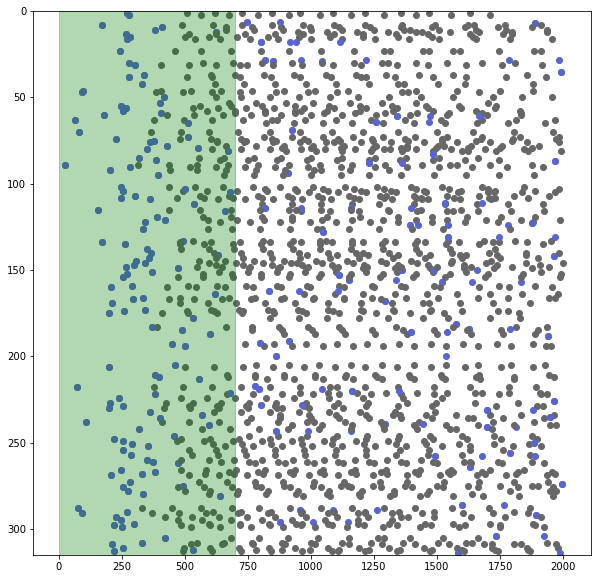

In [33]:
sort = True
window = 700

if sort:
    inds = np.argsort(f['meta'][:,1])
else:
    inds = range(n_trials)

plt.figure(figsize=(10,10))
for i, k in enumerate(inds):
    d = "#5865D8"
    c = "#676768"
    if f['meta'][i,2] == 0:
        c=d
        
    valid_ltimes = f['licktimes'][i][f['licktimes'][i]>0]
    plt.scatter(valid_ltimes, np.ones(np.sum(f['licktimes'][i]>0))*k, color=c)
    try:
        plt.scatter([valid_ltimes[0]], [k], color=d)
    except IndexError:
        pass

plt.axvspan(0, window, alpha=0.3, color='green')
    
plt.xlim=(-250,3000)
plt.ylim(0,n_trials)
plt.gca().invert_yaxis()


0-500 or 700?
Is this data stored somewhere?
Session=experiment number?
Organization of data, repruducibility...

/home/ge0rg/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


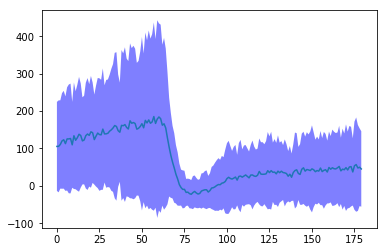

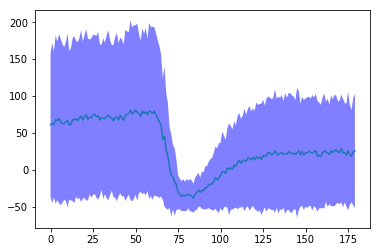

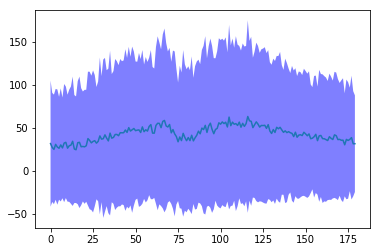

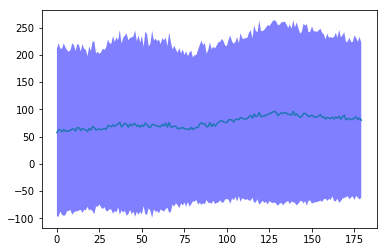

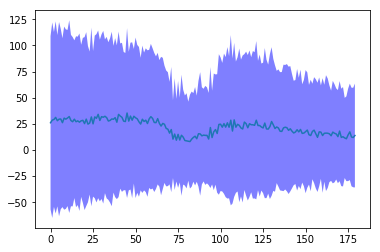

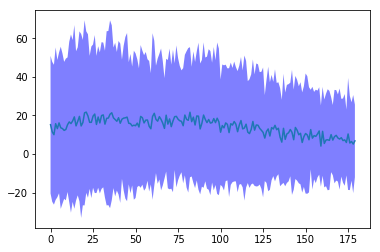

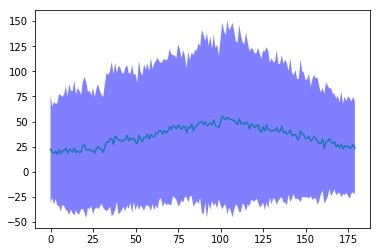

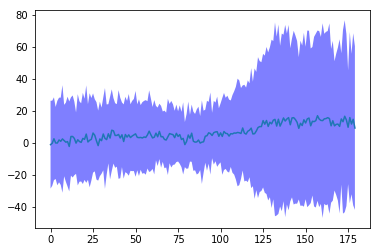

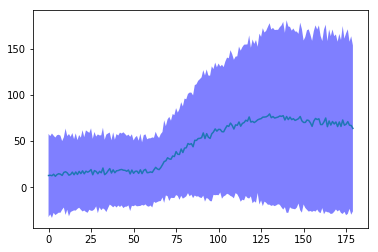

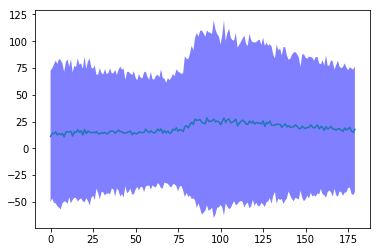

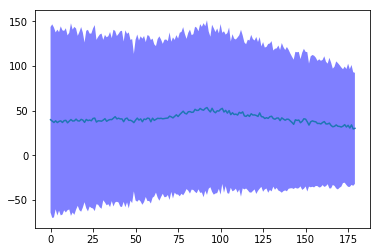

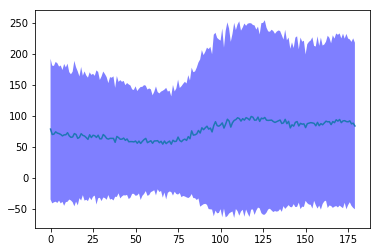

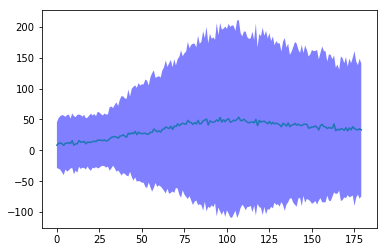

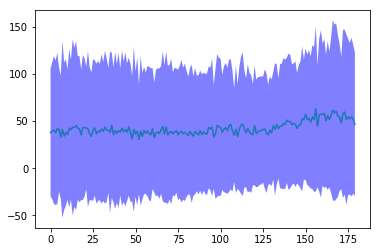

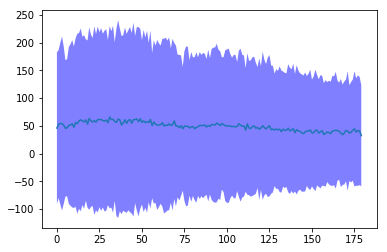

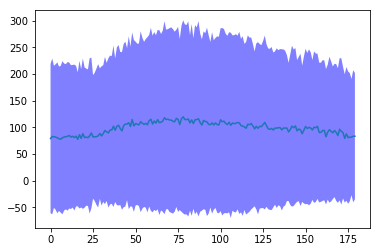

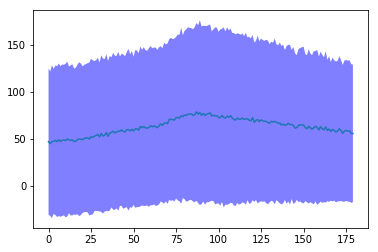

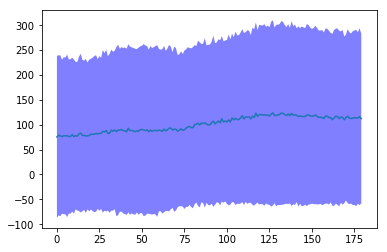

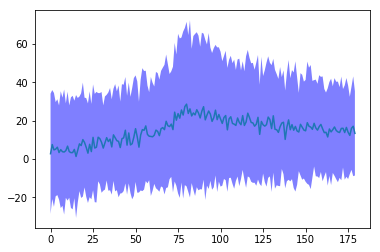

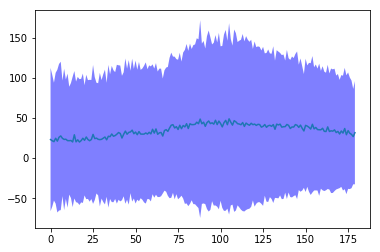

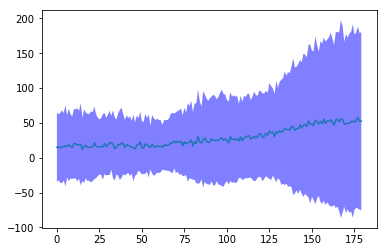

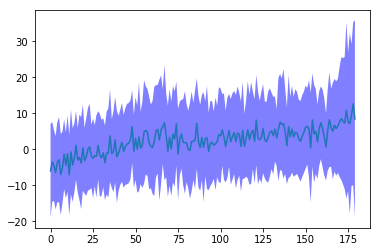

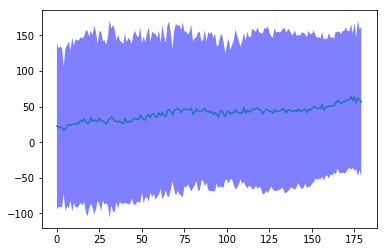

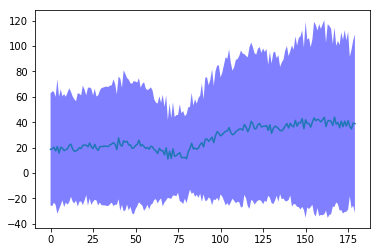

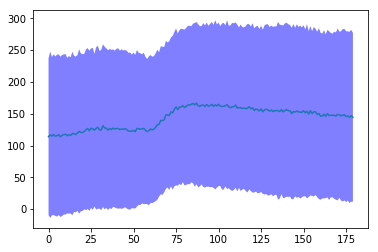

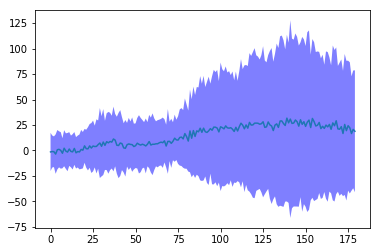

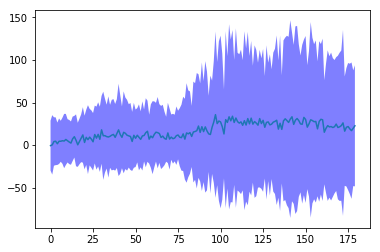

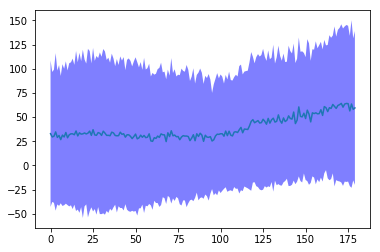

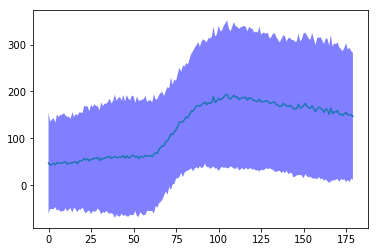

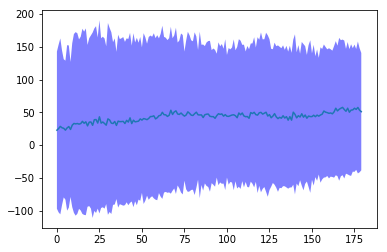

In [17]:
stimInds = np.where(f['meta'][:,1] == 2)
hitInds = np.where(f['meta'][:,2] == 1)
cInds = np.intersect1d(stimInds, hitInds)

for i in range(30):
    trials2 = f['data'][cInds,i,:]
    av = np.mean(trials2, axis=0)
    std = np.std(trials2, axis=0)
    plt.fill_between(np.arange(180), av+std, av-std, facecolor='blue', alpha=0.5)
    plt.plot(np.arange(180), av)
    plt.figure()

/home/ge0rg/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


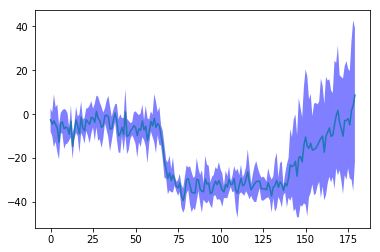

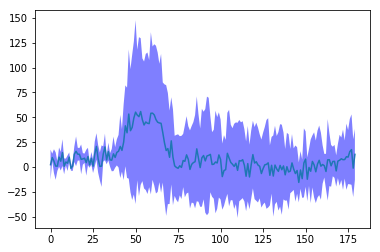

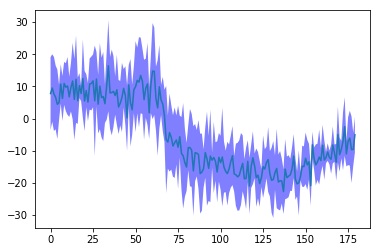

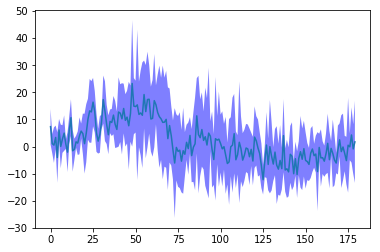

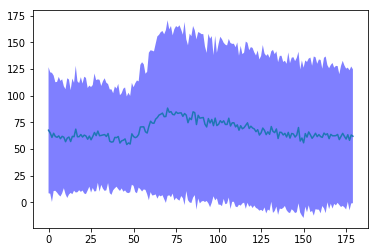

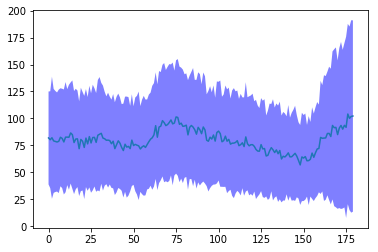

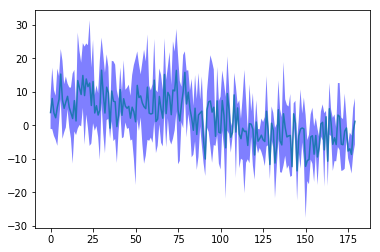

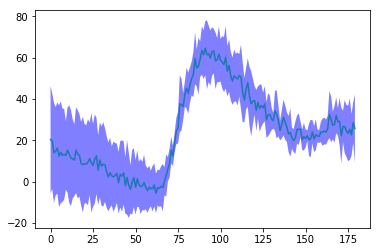

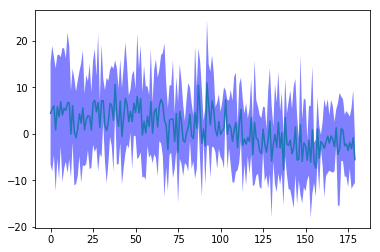

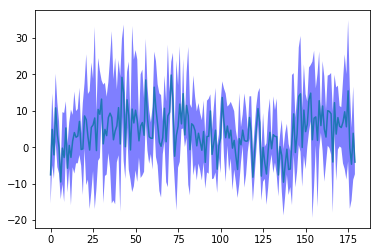

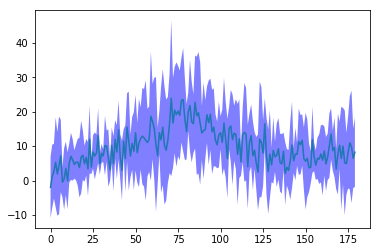

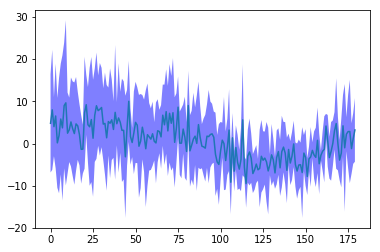

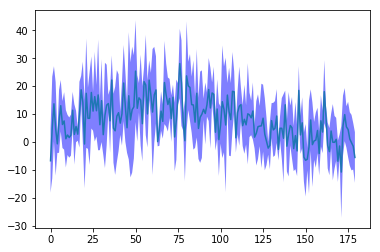

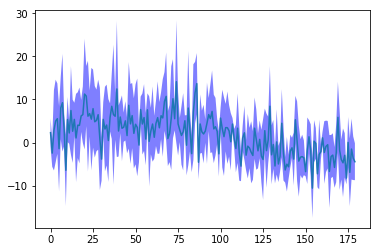

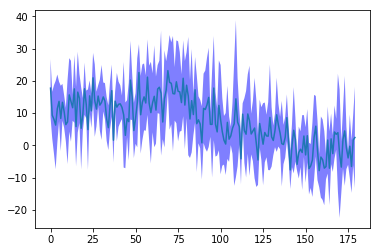

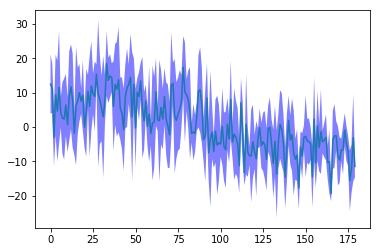

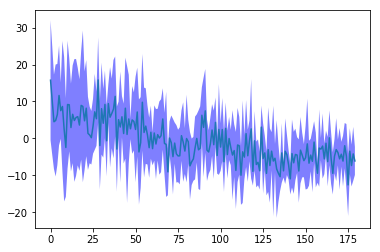

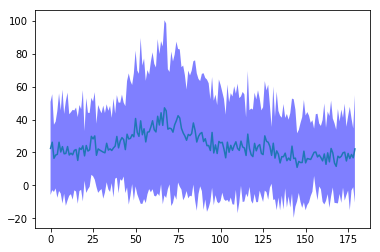

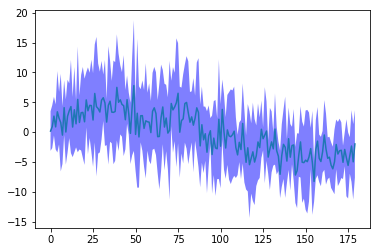

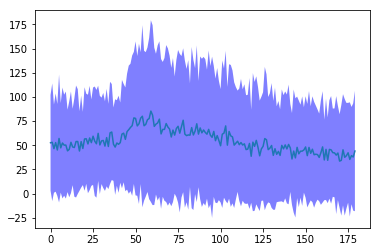

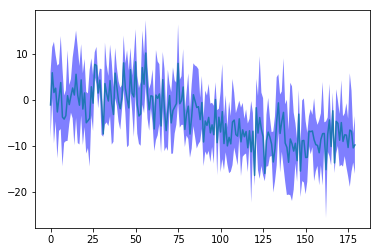

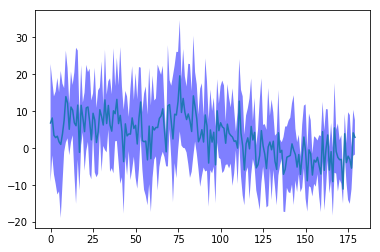

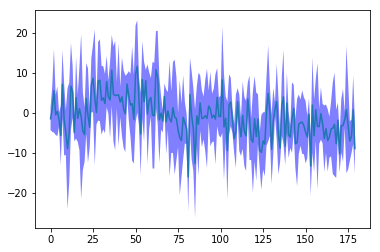

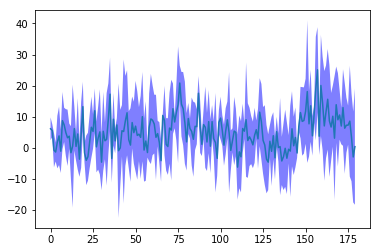

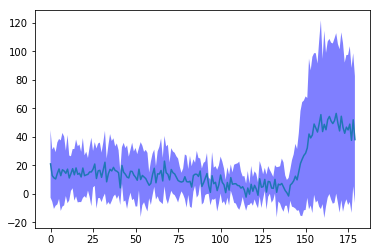

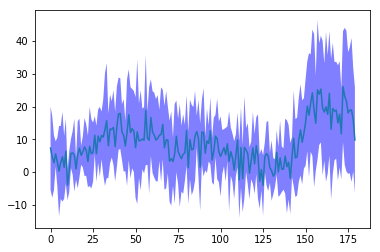

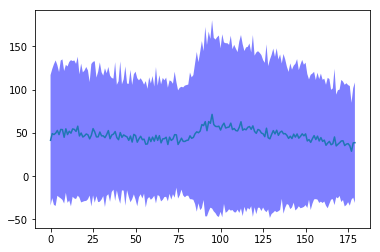

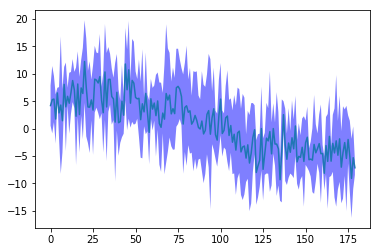

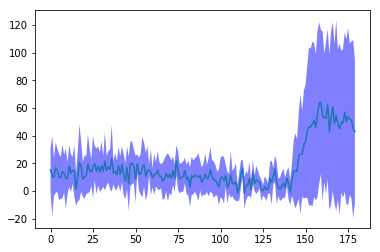

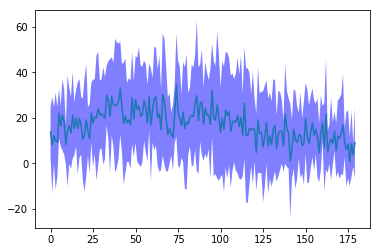

In [41]:
stimInds = np.where(f['meta'][:,1] == 2) #pick stimulus intensity 2
hitInds = np.where(f['meta'][:,2] == 1) #only pick hit trials
sessInds = np.where(f['meta'][:,0] == 160) #pick session 160
cInds = np.intersect1d(stimInds, hitInds)
cInds = np.intersect1d(cInds, sessInds) #intersect everything

for i in range(30):                    #plot first 30
    trials2 = f['data'][cInds,i,:]     #pick relevant trials
    av = np.mean(trials2, axis=0)      #average over them
    std = np.std(trials2, axis=0)      #std
    plt.fill_between(np.arange(180), av+std, av-std, facecolor='blue', alpha=0.5) #plot std corridor
    plt.plot(np.arange(180), av)
    plt.figure()

In [125]:
f['licktimes'][9]

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.], dtype=float32)

In [18]:
f['meta'][342]

array([ 69.,   3.,   0.], dtype=float32)

In [22]:
f['meta'][:,1][inds]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.4993895 ,  0.4993895 ,  0.4993895 ,  0.4993895 ,  0.4993895 ,
        0.4993895 ,  0.4993895 ,  0.4993895 ,  0.4993895 ,  0.4993895 ,
        0.4993895 ,  0.4993895 ,  0.4993895 ,  0.4993895 ,  0.4993895 ,
        0.4993895 ,  0.4993895 ,  0.4993895 ,  0.4993895 ,  0.49

In [37]:
f['meta'][:,0]

array([ 156.,  156.,  156.,  156.,  156.,  156.,  156.,  156.,  156.,
        156.,  156.,  156.,  156.,  156.,  156.,  156.,  156.,  156.,
        156.,  156.,  156.,  156.,  156.,  156.,  156.,  156.,  156.,
        156.,  156.,  156.,  156.,  156.,  156.,  156.,  156.,  157.,
        157.,  157.,  157.,  157.,  157.,  157.,  157.,  157.,  157.,
        157.,  157.,  157.,  157.,  157.,  157.,  157.,  157.,  157.,
        157.,  157.,  157.,  157.,  157.,  157.,  157.,  157.,  157.,
        157.,  157.,  157.,  157.,  157.,  157.,  157.,  158.,  158.,
        158.,  158.,  158.,  158.,  158.,  158.,  158.,  158.,  158.,
        158.,  158.,  158.,  158.,  158.,  158.,  158.,  158.,  158.,
        158.,  158.,  158.,  158.,  158.,  158.,  158.,  158.,  158.,
        158.,  158.,  158.,  158.,  158.,  158.,  159.,  159.,  159.,
        159.,  159.,  159.,  159.,  159.,  159.,  159.,  159.,  159.,
        159.,  159.,  159.,  159.,  159.,  159.,  159.,  159.,  159.,
        159.,  159.,